#### We are going to use the New York Airbnb open data dataset (House renting service).



The data is comprised of the metrics provided by Airbnb, mainly we are going to focus on the price of the listing. Features include, latitude, longitude, the name of the listing, type of space. 

In [46]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns

# Preview of the data
data = pd.read_csv('../dataset/ABNB.csv')
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [47]:
# Calc Z-Score of given parameter. (Mean and std already included)
def calculate_z_score(x, mean, std):
    return (x - mean) / std

In [48]:

# Compute the standard deviation along price axis. 
mean = np.mean(data.price)
std = np.std(data.price)


print('Mean = {}'.format(mean))
print('Standard deviation = {}/n'.format(std))

print('Price   | calculated_z_score')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('{}     | {}'.format(df.price[0], z_score(data.price[0], mean, std)))
print('{}     | {}'.format(df.price[1], z_score(data.price[1], mean, std)))
print('{}     | {}'.format(df.price[2], z_score(data.price[2], mean, std)))
print('{}      | {}'.format(df.price[3], z_score(data.price[3], mean, std)))
print('{}      | {}'.format(df.price[4], z_score(data.price[4], mean, std)))

Mean = 152.7206871868289
Standard deviation = 240.15171391941718/n
Price   | calculated_z_score
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
149     | -0.015493069468899924
225     | 0.30097354557054873
150     | -0.011329035060486126
89      | -0.2653351339737278
80      | -0.302811443649452


<AxesSubplot:xlabel='price', ylabel='Density'>

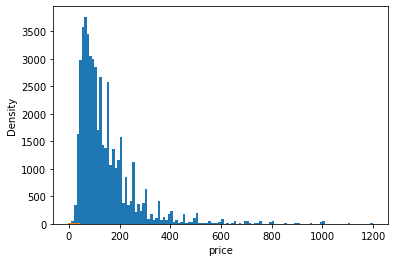

In [50]:
#Calculate z-scores
zscores = stats.zscore(data.price)
plt.hist(data.price, bins = 120, range=(0, 1200))
#Kernel density estimate plot
sns.kdeplot(zscores)